## 2D 数据类别划分（K-Means 模型）

- 采用Kmeans算法实现2D数据自动聚类，预测V1=80,V2=60数据类别；
- 计算预测准确率，完成结果矫正；
- 与 KNN 和 Meanshift 算法模型对比；

数据：clustring/2d_data.csv

### 加载数据，观察数据中的两个维度是V1 和 V2，以及结果 labels

In [49]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('../dataset/clustering/2d_data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


### 分别设置特征数据 X 和 对应的结果数据 y

In [50]:
# define x and y
X = data.drop(['labels'], axis = 1)
y = data.loc[:, 'labels']
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


### 计算分类类别的计数，显示的通知 K-Means 算法有3个分类

分类0 有890个，分类1 有954个，分类2 有1156个

In [51]:
pd.Series(y).value_counts()

labels
2    1156
1     954
0     890
Name: count, dtype: int64

### 通过散点图观察三个分类的分布，每个群组（簇）的形状是凸的

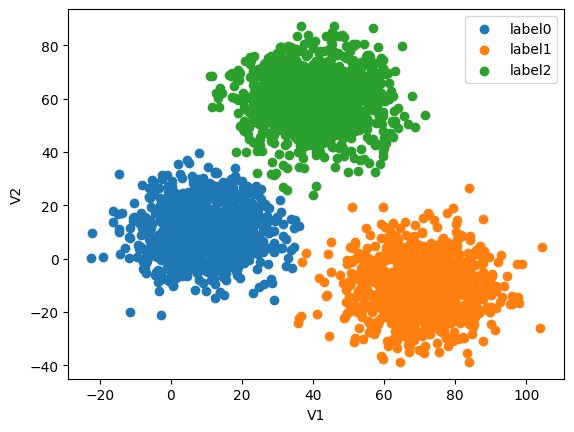

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2

fig1 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][mask0], X.loc[:, 'V2'][mask0])
label1 = plt.scatter(X.loc[:, 'V1'][mask1], X.loc[:, 'V2'][mask1])
label2 = plt.scatter(X.loc[:, 'V1'][mask2], X.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.show()

## 使用K-Means模型，无监督学习，不需要数据标注结果

### 创建 KMeans实例，指定 cluster 的数量是 3

In [53]:
# set the model
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, random_state=0)
KM.fit(X).get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

### 观察每个分类的质心

In [54]:
centers = KM.cluster_centers_
print(centers)

[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


### 可视化数据分类和质心，了解质心的位置和原始数据分类之间的关系

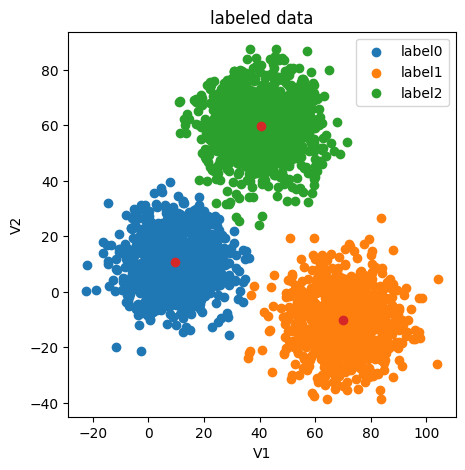

In [55]:
mask0 = y == 0
mask1 = y == 1
mask2 = y == 2

fig2 = plt.figure(figsize=(5, 5))
plt.title("labeled data")
label0 = plt.scatter(X.loc[:, "V1"][mask0], X.loc[:, "V2"][mask0])
label1 = plt.scatter(X.loc[:, "V1"][mask1], X.loc[:, "V2"][mask1])
label2 = plt.scatter(X.loc[:, "V1"][mask2], X.loc[:, "V2"][mask2])
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

### 预测[80, 60]数据是哪个分类，结果是分类0，不正确

In [56]:
# predict: test data: V1=80, V2=60

y_predict_test = KM.predict(pd.DataFrame([[80, 60]], columns=["V1", "V2"]))

print(y_predict_test)

[0]


### 预测训练数据的分类，并分别查看三个分类数据的数量，分析可能的分类情况是2 和 0 需要对调

In [57]:
# predict based on training data
y_predict = KM.predict(X)
print(pd.Series(y_predict).value_counts(), pd.Series(y).value_counts())

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


### 评估模型的 accuracy，结果是 0.32，比较差

In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.31966666666666665


### 可视化预测结果的分类和质心，了解质心的位置和预测结果数据分类之间的关系

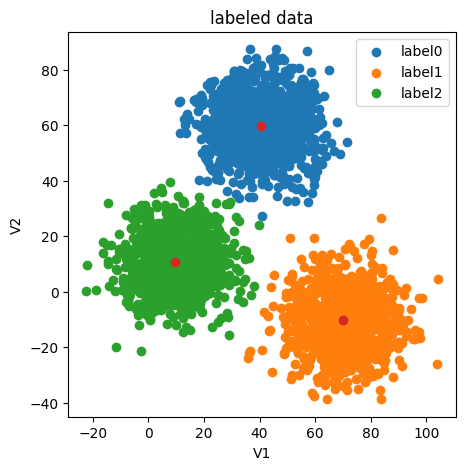

In [59]:
# visualize data and result

mask0 = y_predict == 0
mask1 = y_predict == 1
mask2 = y_predict == 2

fig4 = plt.figure(figsize=(5, 5))
plt.title("labeled data")
label0 = plt.scatter(X.loc[:, "V1"][mask0], X.loc[:, "V2"][mask0])
label1 = plt.scatter(X.loc[:, "V1"][mask1], X.loc[:, "V2"][mask1])
label2 = plt.scatter(X.loc[:, "V1"][mask2], X.loc[:, "V2"][mask2])
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

### 同时观察原始数据和预测数据，了解分类的对应关系是2和0要对调，跟通过观察count的结论一致

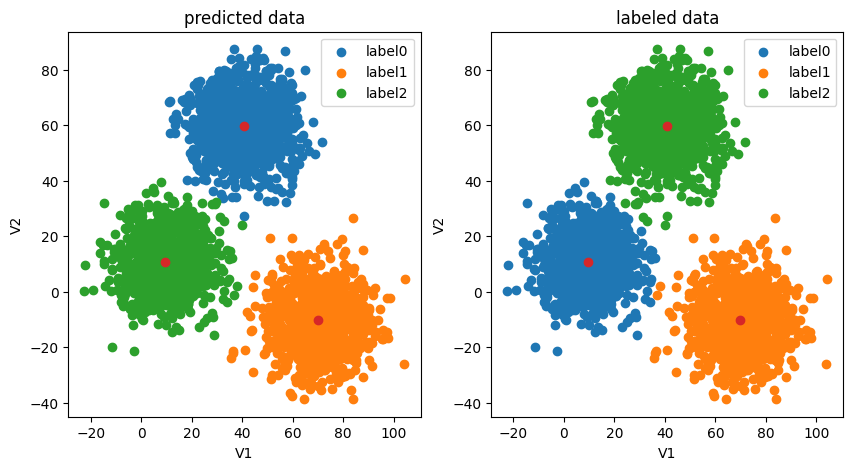

In [60]:
# visualize data and result

mask0 = y_predict == 0
mask1 = y_predict == 1
mask2 = y_predict == 2
plt.figure(figsize=(10, 5))
fig5 = plt.subplot(1, 2, 1)
plt.title("predicted data")
label0 = plt.scatter(X.loc[:, "V1"][mask0], X.loc[:, "V2"][mask0])
label1 = plt.scatter(X.loc[:, "V1"][mask1], X.loc[:, "V2"][mask1])
label2 = plt.scatter(X.loc[:, "V1"][mask2], X.loc[:, "V2"][mask2])
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
fig6 = plt.subplot(1, 2, 2)
plt.title("labeled data")
label0 = plt.scatter(X.loc[:, "V1"][mask0], X.loc[:, "V2"][mask0])
label1 = plt.scatter(X.loc[:, "V1"][mask1], X.loc[:, "V2"][mask1])
label2 = plt.scatter(X.loc[:, "V1"][mask2], X.loc[:, "V2"][mask2])
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

### 调整顺序，把 0 和 2 对调，1不变

In [61]:
# correct the results
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(2)
    elif i == 1:
        y_corrected.append(1)
    elif i == 2:
        y_corrected.append(0)

print(pd.Series(y_corrected).value_counts(), pd.Series(y).value_counts())

2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


### 评估预测结果，accuracy score 为 0.997，效果非常好

In [62]:
print(accuracy_score(y, y_corrected))

0.997


### 最后再展示调整后的分类结果

In [63]:
# y_corrected 是 List，转成 NumPy的array类型
y_corrected = np.array(y_corrected)

print(type(y_corrected))
print(y_corrected.shape)


<class 'numpy.ndarray'>
(3000,)


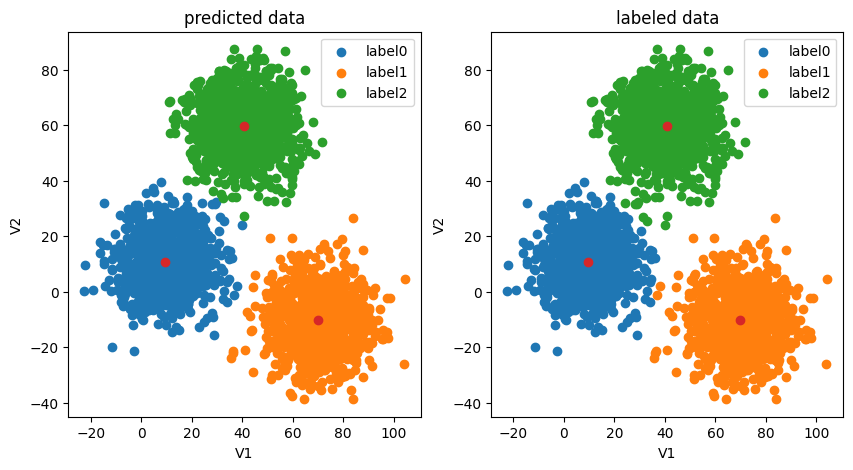

In [64]:
mask0 = y_corrected == 0
mask1 = y_corrected == 1
mask2 = y_corrected == 2

plt.figure(figsize=(10, 5))

fig7 = plt.subplot(121)
plt.title("predicted data")
label0 = plt.scatter(X.loc[:, 'V1'][mask0], X.loc[:, 'V2'][mask0])
label1 = plt.scatter(X.loc[:, 'V1'][mask1], X.loc[:, 'V2'][mask1])
label2 = plt.scatter(X.loc[:, 'V1'][mask2], X.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
fig8 = plt.subplot(122)
plt.title("labeled data")
label0 = plt.scatter(X.loc[:, 'V1'][mask0], X.loc[:, 'V2'][mask0])
label1 = plt.scatter(X.loc[:, 'V1'][mask1], X.loc[:, 'V2'][mask1])
label2 = plt.scatter(X.loc[:, 'V1'][mask2], X.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()